In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadardiputra/potato-leaf-disease-dataset")

print("Path to dataset files:", path)

100%|██████████| 25.2M/25.2M [00:00<00:00, 104MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/muhammadardiputra/potato-leaf-disease-dataset/versions/1


In [3]:
import os

# List the dataset files
print("Dataset files:", os.listdir(path))


Dataset files: ['Potato']


In [4]:
!cp -r {path} /content/dataset
!ls /content/dataset  # Verify the dataset files


Potato


In [6]:
import tensorflow as tf

# Load the dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/dataset/Potato/Train',  # Path to the dataset directory
    seed=123,                                   # Random seed for reproducibility
    shuffle=True,                               # Shuffle the dataset
    image_size=(256, 256),                      # Resize images to 224x224 (or any size you prefer)
    batch_size=32                               # Batch size
                    )

                    # Display the loaded dataset
print(train_dataset)



Found 900 files belonging to 3 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [7]:
batch_size=32
image_size=255
channel=3
epochs=20

In [8]:
len(train_dataset)

29

In [9]:
class_names=train_dataset.class_names

In [10]:
import numpy as np
for images,labels in train_dataset.take(1):
  print('image_shape',images.shape)
  print('label',labels.numpy)
  print('image',images[0])

image_shape (32, 256, 256, 3)
label <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 2, 2, 2, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2], dtype=int32)>>
image tf.Tensor(
[[[147. 135. 139.]
  [117. 105. 109.]
  [160. 148. 152.]
  ...
  [189. 179. 178.]
  [189. 179. 178.]
  [189. 179. 178.]]

 [[125. 113. 117.]
  [154. 142. 146.]
  [136. 124. 128.]
  ...
  [187. 177. 176.]
  [187. 177. 176.]
  [186. 176. 175.]]

 [[131. 119. 123.]
  [126. 114. 118.]
  [143. 131. 135.]
  ...
  [190. 180. 179.]
  [190. 180. 179.]
  [190. 180. 179.]]

 ...

 [[133. 120. 127.]
  [135. 122. 129.]
  [147. 134. 141.]
  ...
  [166. 156. 165.]
  [161. 151. 160.]
  [168. 158. 167.]]

 [[139. 126. 133.]
  [137. 124. 131.]
  [155. 142. 149.]
  ...
  [170. 160. 169.]
  [167. 157. 166.]
  [170. 160. 169.]]

 [[148. 135. 142.]
  [135. 122. 129.]
  [148. 135. 142.]
  ...
  [168. 158. 167.]
  [164. 154. 163.]
  [162. 152. 161.]]

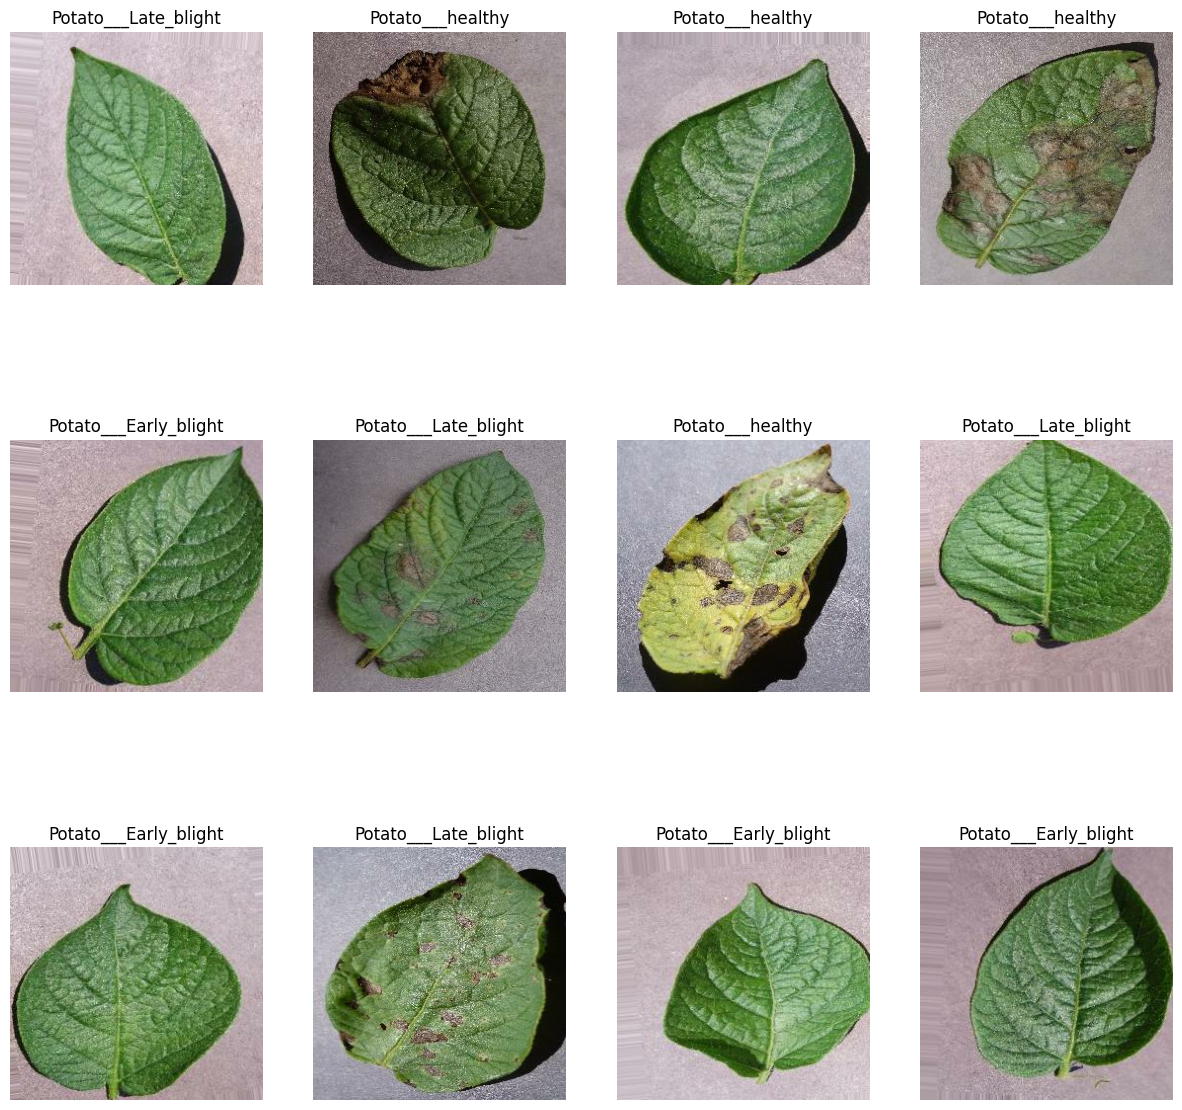

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for images,labes in train_dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow((images[i].numpy()).astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis('off')



In [12]:
len(train_dataset)

29

In [13]:
dataset=train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)

])

In [16]:
dataset=dataset.map(lambda x,y : (data_augmentation(x,training=True),y)).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
len(dataset)

29

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import BatchNormalization

# Define the input shape for your images
input_shape = (255, 255, 3)  # Image dimensions (height, width, channels)
resize_and_rescale = tf.keras.Sequential([
      layers.Resizing(255, 255),    # Ensure resize to (256, 256)
          layers.Rescaling(1./255),                    # Rescale pixel values
          ])

# Initialize the model
model = models.Sequential([
        layers.InputLayer(input_shape),
        resize_and_rescale,


                            # First Convolutional Layer

        layers.BatchNormalization(),
    # First Convolutional Layer
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),  # Max-pooling with pool size (2, 2)

                    # Second Convolutional Layer
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

                                    # Third Convolutional Layer
         layers.Conv2D(64, (3, 3), activation='relu'),
         layers.MaxPooling2D((2, 2)),

         layers.Conv2D(64, (3, 3), activation='relu'),


         layers.MaxPooling2D((2, 2)),

         layers.Conv2D(64, (3, 3), activation='relu'),


         layers.MaxPooling2D((2, 2)),

         layers.Conv2D(64, (3, 3), activation='relu'),
         layers.MaxPooling2D((2, 2)),


                                                    # Flatten the output for the fully connected layer
         layers.Flatten(),

                                                                # Fully Connected Layer
         layers.Dense(64, activation='relu'),

                                                                            # Output Layer (assuming 3 classes for classification)
         layers.Dense(3, activation='softmax')  # Change the number of classes based on your dataset
                                                                                ])

                                                                                # Compile the model

model.build()
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 255, 255, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 255, 255, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 253, 253, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,759 (717.81 KB)

 Trainable params: 183,753 (717.79 KB)

 Non-trainable params: 6 (24.00 B)

In [20]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
valid_dataset= tf.keras.preprocessing.image_dataset_from_directory(
      directory='/content/dataset/Potato/Valid',
      seed=123,                                   # Random seed for reproducibility
      shuffle=True,                               # Shuffle the dataset
      image_size=(256, 256),                      # Resize images to 224x224 (or any size you prefer)
      batch_size=32                               # Batch size
                                          )

                                                              # Display the loaded dataset
print(valid_dataset)

Found 300 files belonging to 3 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [29]:
history = model.fit(
      dataset,
      validation_data=valid_dataset,  # This ensures 'val_loss' is calculated
      batch_size=32,
      verbose=1,
      epochs=20
                      )


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 356ms/step - accuracy: 0.9641 - loss: 0.1146 - val_accuracy: 0.9900 - val_loss: 0.0759
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 350ms/step - accuracy: 0.9805 - loss: 0.0885 - val_accuracy: 0.9933 - val_loss: 0.0254
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 356ms/step - accuracy: 0.9750 - loss: 0.0623 - val_accuracy: 0.9933 - val_loss: 0.0214
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 363ms/step - accuracy: 0.9872 - loss: 0.0464 - val_accuracy: 0.9933 - val_loss: 0.0207
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 355ms/step - accuracy: 0.9728 - loss: 0.0607 - val_accuracy: 0.9767 - val_loss: 0.0583
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 317ms/step - accuracy: 0.9837 - loss: 0.0601 - val_accuracy: 0.9900 - val_loss: 0.0332
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 357ms/step - accuracy: 0.9842 - loss: 0.0442 - val_accuracy: 0.9633 - val_loss: 0.0928
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 355ms/step - accuracy: 0.9782 - loss: 0.0722 - val_accur

In [35]:
# Save in .keras format (preferred in Keras 3)
model.save('my_model.keras', save_format='keras')




In [37]:
test_dataset= tf.keras.preprocessing.image_dataset_from_directory(
        directory='/content/dataset/Potato/Test',
        seed=123,                                   # Random seed for reproducibility
        shuffle=True,                               # Shuffle the dataset
        image_size=(256, 256),                      # Resize images to 224x224 (or any size you prefer)
        batch_size=32                               # Batch size
)

                                                                                                                                        # Display the loaded dataset
print(test_dataset)

Found 300 files belonging to 3 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [38]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9882 - loss: 0.0524
Test Loss: 0.09294463694095612
Test Accuracy: 0.9866666793823242


In [39]:
predictions = model.predict(test_dataset)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [27]:
print(history)
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 20, 'steps': 10}
dict_keys(['accuracy', 'loss'])


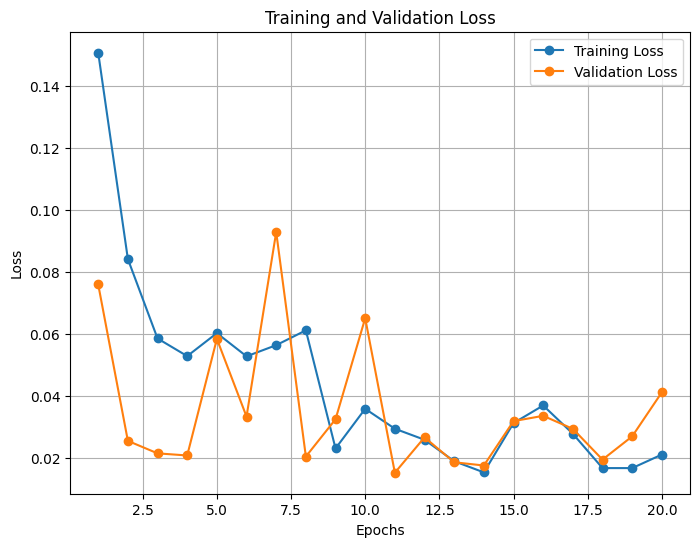

In [30]:
# Extract loss and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(train_loss) + 1)

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [36]:
model = tf.keras.models.load_model('my_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 20 variables whereas the saved optimizer has 37 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
predicted label: Potato___Late_blight


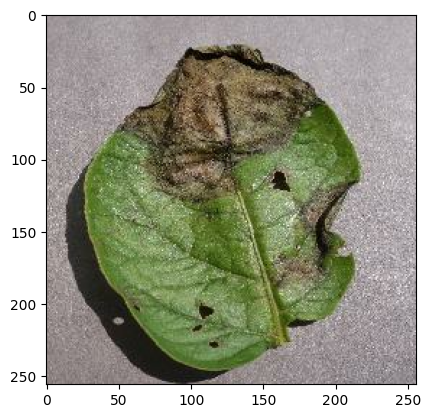

In [40]:

import numpy as np
for images, labels in test_dataset.take(1):

        first_image = images[0].numpy().astype('uint8')
        first_label = labels[0].numpy()

        print("first image to predict")
        plt.imshow(first_image)
        print("actual label:",class_names[first_label])

        batch_prediction = model.predict(images)
        print("predicted label:",class_names[np.argmax(batch_prediction[0])])